In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 数据加载

In [4]:
data_dir = 'D:\\Mine\\Py\\DC_PV_Power_Predict_2018\\DC_Data\\'

data_train1 = pd.read_csv( data_dir + 'train_1.csv' )
data_train2 = pd.read_csv( data_dir + 'train_2.csv' )
data_train3 = pd.read_csv( data_dir + 'train_3.csv' )
data_train4 = pd.read_csv( data_dir + 'train_4.csv' )
data_train = pd.concat( [data_train1, data_train2, data_train3, data_train4] ) 

data_test1 = pd.read_csv( data_dir + 'test_1.csv' )
data_test2 = pd.read_csv( data_dir + 'test_2.csv' )
data_test3 = pd.read_csv( data_dir + 'test_3.csv' )
data_test4 = pd.read_csv( data_dir + 'test_4.csv' )
data_test = pd.concat( [data_test1, data_test2, data_test3, data_test4] )

# 数据探索

In [10]:
print( data_train.head() )

                    时间  辐照度        风速   风向        温度        压强        湿度  \
0  2016-04-01 00:00:00 -1.0 -0.707547  251 -0.090909 -0.030303 -0.157895   
1  2016-04-01 00:15:00 -1.0 -0.707547  251 -0.090909 -0.030303 -0.157895   
2  2016-04-01 00:30:00 -1.0 -0.716981  250 -0.107071 -0.030303 -0.136842   
3  2016-04-01 00:45:00 -1.0 -0.726415  248 -0.123232  0.030303 -0.094737   
4  2016-04-01 01:00:00 -1.0 -0.735849  244 -0.135354  0.030303 -0.073684   

   实发辐照度      实际功率  
0    0.0 -0.019333  
1    0.0 -0.019333  
2    0.0 -0.021000  
3    0.0 -0.022000  
4    0.0 -0.022000  


In [8]:
print( data_test.head() )

   id                       时间  辐照度        风速   风向        温度        压强  \
0   1  2018-04-30 23:59:59.985 -1.0 -0.801887    8 -0.046465  0.272727   
1   2  2018-05-01 00:14:59.985 -1.0 -0.783019    2 -0.058586  0.272727   
2   3  2018-05-01 00:29:59.985 -1.0 -0.783019  358 -0.066667  0.272727   
3   4  2018-05-01 00:44:59.985 -1.0 -0.773585  351 -0.078788  0.272727   
4   5  2018-05-01 00:59:59.985 -1.0 -0.754717  344 -0.090909  0.272727   

         湿度  
0  0.221053  
1  0.221053  
2  0.221053  
3  0.242105  
4  0.242105  


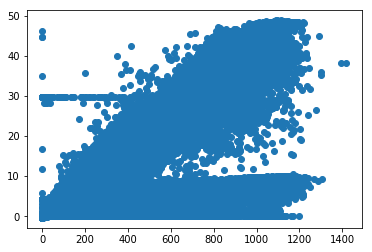

In [13]:
plt.scatter( data_train['实发辐照度'], data_train['实际功率'] ) 

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183093 entries, 0 to 42686
Data columns (total 9 columns):
时间       183093 non-null object
辐照度      183093 non-null float64
风速       183093 non-null float64
风向       183093 non-null int64
温度       183093 non-null float64
压强       183093 non-null float64
湿度       183093 non-null float64
实发辐照度    183093 non-null float64
实际功率     183093 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 14.0+ MB


In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46571 entries, 0 to 13893
Data columns (total 8 columns):
id     46571 non-null int64
时间     46571 non-null object
辐照度    46571 non-null float64
风速     46571 non-null float64
风向     46571 non-null int64
温度     46571 non-null float64
压强     46571 non-null float64
湿度     46571 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.2+ MB


In [6]:
data_train.describe()

,辐照度,风速,风向,温度,压强,湿度,实发辐照度,实际功率
count,183093.000000,183093.000000,183093.000000,183093.000000,183093.000000,183093.000000,183093.000000,183093.000000
mean,-0.589675,-0.638823,169.799544,-0.015864,0.098247,-0.087954,217.638943,4.846102
std,0.549945,0.286773,96.834579,0.395048,0.301025,0.455642,320.772498,9.499288
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-0.020000,-0.397667
25%,-1.000000,-0.849057,96.000000,-0.337374,-0.090909,-0.458333,0.000000,-0.018000
50%,-0.965779,-0.716981,125.000000,-0.042424,0.090909,-0.145833,0.711000,0.000000
75%,-0.205323,-0.509434,275.000000,0.292929,0.333333,0.263158,382.333000,5.702330
max,1.000000,1.000000,359.000000,1.000000,1.000000,1.000000,1419.200000,48.834700


In [16]:
data_test.describe()

,id,辐照度,风速,风向,温度,压强,湿度
count,46571.00000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000
mean,23286.00000,-0.529024,-0.639687,132.248051,0.355123,0.026480,0.319028
std,13444.03403,0.580424,0.227123,80.058099,0.207354,0.261409,0.389574
min,1.00000,-1.000000,-1.000000,0.000000,-0.256566,-0.696970,-0.812500
25%,11643.50000,-1.000000,-0.801887,90.000000,0.232323,-0.151515,0.043478
50%,23286.00000,-0.857434,-0.679245,104.000000,0.354167,0.000000,0.375000
75%,34928.50000,-0.098963,-0.518868,129.000000,0.503030,0.212121,0.625000
max,46571.00000,0.961977,0.636364,359.000000,0.904167,0.857143,1.000000
